In [64]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy.io import loadmat

In [16]:
Bead_IDs = np.array([4, 41, 11, 34, 22, 25, 42, 47, 45, 10, 19, 27, 31, 
            38, 53, 48, 43, 39, 12, 13, 51, 52, 14, 50, 28, 18,
            37, 15, 21, 9, 33, 20, 6, 40, 3, 8])
Hematite_IDs = np.array([6, 8, 5, 14, 32, 30, 28, 20, 16, 24, 10, 26, 25, 
                34, 33, 18, 21, 23, 11, 29, 36, 27, 35, 7, 31,
                22, 15, 19, 12, 17, 13, 9, 1, 2, 4, 3])
tip_index = 17 

In [5]:
def animate(pos, passive_id, trapped_id):

    fig, ax = plt.subplots()

    scat1 = ax.scatter(pos[:, 0, 0] , pos[:, 0, 1])
    scat2 = ax.scatter(pos[passive_id, 0, 0], pos[passive_id, 0, 1])
    scat3 = ax.scatter(pos[trapped_id, 0, 0], pos[trapped_id, 0, 1])
    
    xlim = (np.min(pos[:, :, 0]), np.max(pos[:, :, 0]))
    ylim = (np.min(pos[:, :, 1]), np.max(pos[:, :, 1]))
    
    ax.set(xlim=xlim, ylim=ylim)


    def update(n):
        scat1.set_offsets(pos[:, n])
        scat2.set_offsets(pos[passive_id, n])
        scat3.set_offsets(pos[trapped_id, n])
        return (scat1)


    ani = animation.FuncAnimation(fig=fig, func=update, frames=300, interval=30)
    return ani

In [17]:
theta = loadmat('Data/SingleTrack/TRACK_BEAD.mat')['TRACK_BEAD']
p = loadmat('Data/SingleTrack/TRACK_HEMATITE.mat')['TRACK_HEMATITE']

In [8]:
print(p[0])
print(theta[0])

print(p.shape)
print(theta.shape)

t = theta[theta[:, 0] == 1][:, -1]
print(t)

[  1.         597.55463948 705.59271248   1.        ]
[  1.         517.06316409 687.4966855    1.        ]
(180000, 4)
(270000, 4)
[1.000e+00 2.000e+00 3.000e+00 ... 4.998e+03 4.999e+03 5.000e+03]


In [18]:
theta_trajs = np.empty((len(Bead_IDs), len(t), 2))
for (i, ID) in enumerate(Bead_IDs): 
    c = theta[theta[:, 0] == ID]
    theta_trajs[i] = c[:, 1:3] 
    
p_trajs = np.empty((len(Hematite_IDs), len(t), 2))
for (i, ID) in enumerate(Hematite_IDs):
    c = p[p[:, 0] == ID]
    p_trajs[i] = c[:, 1:3] 

6 (5000, 4)
8 (5000, 4)
5 (5000, 4)
14 (5000, 4)
32 (5000, 4)
30 (5000, 4)
28 (5000, 4)
20 (5000, 4)
16 (5000, 4)
24 (5000, 4)
10 (5000, 4)
26 (5000, 4)
25 (5000, 4)
34 (5000, 4)
33 (5000, 4)
18 (5000, 4)
21 (5000, 4)
23 (5000, 4)
11 (5000, 4)
29 (5000, 4)
36 (5000, 4)
27 (5000, 4)
35 (5000, 4)
7 (5000, 4)
31 (5000, 4)
22 (5000, 4)
15 (5000, 4)
19 (5000, 4)
12 (5000, 4)
17 (5000, 4)
13 (5000, 4)
9 (5000, 4)
1 (5000, 4)
2 (5000, 4)
4 (5000, 4)
3 (5000, 4)


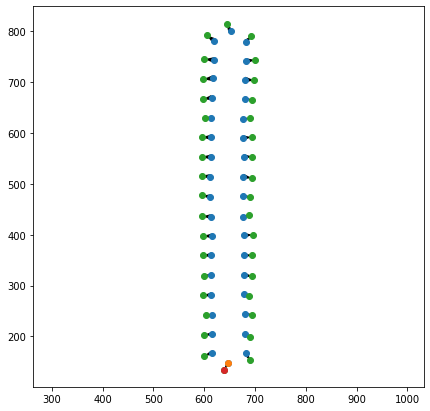

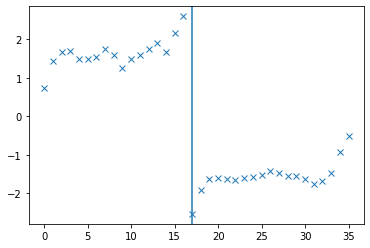

In [43]:
n = 10

vectors = p_trajs[:, n] - theta_trajs[:, n]
fig = plt.figure(figsize=(7, 7))
plt.plot(theta_trajs[:, n, 0], theta_trajs[:, n, 1], 'o')
plt.plot(theta_trajs[tip_index, n, 0], theta_trajs[tip_index, n, 1], 'o')
plt.plot(p_trajs[:, n, 0], p_trajs[:, n, 1], 'o')
plt.plot(p_trajs[tip_index, n, 0], p_trajs[tip_index, n, 1], 'o')
plt.quiver(*theta_trajs[:, n].T, *vectors.T, angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.show()

plt.plot(np.arctan2(*vectors.T), 'x')
plt.axvline(x=tip_index)
plt.show()

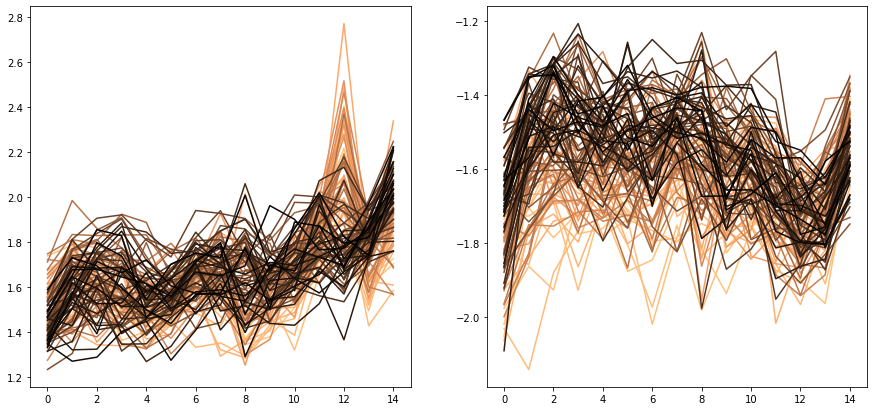

In [102]:
spacing = 50 
colors = plt.get_cmap('copper_r')(np.linspace(0, 1, len(t[::spacing])))

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
for (i, n) in enumerate(t[::spacing].astype('int')):
    vectors = p_trajs[:, n] - theta_trajs[:, n]
    axs[0].plot(np.arctan2(*vectors.T)[1:tip_index-1], c=colors[i])
    axs[1].plot(np.arctan2(*vectors.T)[tip_index+2:-2], c=colors[i])
plt.show()

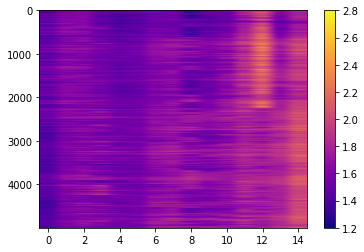

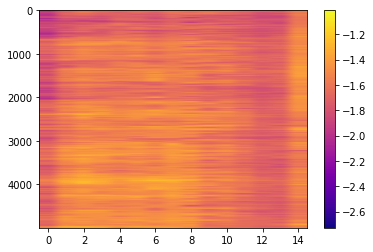

In [103]:
v_trajs = p_trajs - theta_trajs 
angles = np.arctan2(*v_trajs.T)
plt.imshow(angles[:, 1:tip_index-1], vmin=1.2, vmax=2.8, aspect='auto', cmap='plasma')
plt.colorbar()
plt.show()

plt.imshow(angles[:, tip_index+2:-2], aspect='auto', cmap='plasma')
plt.colorbar()
plt.show()

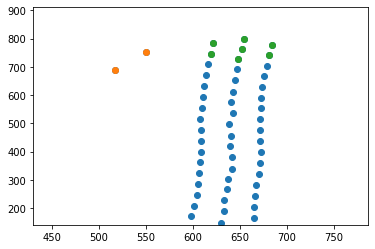

In [82]:
ani = animate(bead_pos, passive_id, trapped_id)
HTML(ani.to_jshtml())
plt.close() 

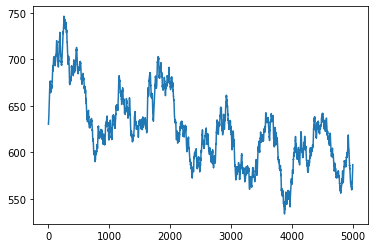

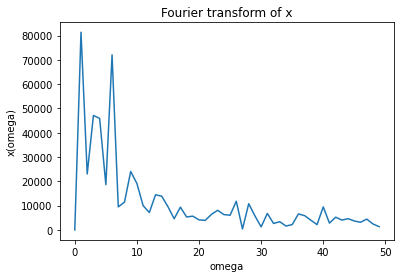

In [6]:
end_bead = bead_pos[end_id]
x = end_bead[:, 0]
plt.plot(x)
plt.show() 

x_omega = np.abs(np.fft.fft(x))
x_omega[0] = 0 
plt.plot(x_omega[:50])
plt.xlabel('omega')
plt.ylabel('x(omega)')
plt.title('Fourier transform of x')
plt.show() 

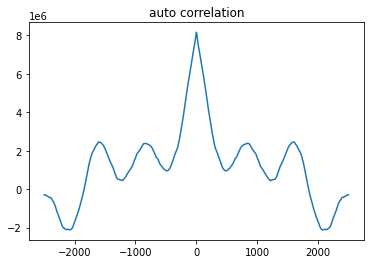

In [7]:
corr = np.correlate(x-np.mean(x), x-np.mean(x), mode='same')
plt.plot(np.linspace(-2500, 2500, 5000), corr)
plt.title('auto correlation')
plt
plt.show() 